[TOC]  
製作者: 足立侑駿  
20180620

# air_reseデータテーブル確認
### 目的
air_reseのテーブルをチェックする  
アブストラクトは下記に書き留める  
### air_reseは4つのカラムが存在している  



|カラム名|air_store_id|visit_datetime|reserve_datetime|reserve_visitors|
| ----  | ----       | ----         | ----           |----            |
|意味|airレジを使用している店のID|客の訪問日時|予約日時|予約客人数|
|データ型|ID         |datetime           |datetime           |int             |
|最小|-             |2016-01-01 19:00:00|2016-01-01 01:00:00|      0          |
|最大| -            |2017-05-31 21:00:00|2017-04-22 23:00:00|       100         |
|異常値|無し|無し|無し|無し|


||reserve_visitors|
| ----  | ----       |
|count	|92378.000000|
|mean	|4.481749|
|std	|4.919669|
|min	|1.000000|
|25%	|2.000000|
|50%	|3.000000|
|75%	|5.000000|
|max	|100.000000|

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

comma_formatter = mpl.ticker.FuncFormatter(lambda x, _: u'{:,.0f}'.format(x))

In [2]:
sns.set(font=['IPAMincho'])
sns.set_style("dark")

In [3]:
air_rese_df = pd.read_csv('../data/air_reserve.csv')

In [4]:
air_rese_df.dtypes

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [5]:
air_rese_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [6]:
air_rese_df['visit_datetime'] = pd.to_datetime(
    air_rese_df['visit_datetime'])
air_rese_df['reserve_datetime'] = pd.to_datetime(
    air_rese_df['reserve_datetime'])

In [7]:
air_rese_df.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [8]:
air_rese_df.describe(include='all')

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
count,92378,92378,92378,92378.000000
unique,314,4975,7513,NaN
top,air_8093d0b565e9dbdf,2016-12-24 19:00:00,2016-11-24 18:00:00,NaN
freq,2263,255,106,NaN
first,NaN,2016-01-01 19:00:00,2016-01-01 01:00:00,NaN
last,NaN,2017-05-31 21:00:00,2017-04-22 23:00:00,NaN
mean,NaN,NaN,NaN,4.481749
std,NaN,NaN,NaN,4.919669
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2.000000


In [9]:
air_rese_df.isnull().all()

air_store_id        False
visit_datetime      False
reserve_datetime    False
reserve_visitors    False
dtype: bool

In [10]:
air_rese_df.isna().any()

air_store_id        False
visit_datetime      False
reserve_datetime    False
reserve_visitors    False
dtype: bool

## 予約客数の分布を確認する

In [11]:

def max_min(df):
    return (df.max(), df.min())

In [12]:

max_min(air_rese_df['reserve_visitors'])

(100, 1)

予約客数のヒストグラム  
横軸、人数  
縦軸、

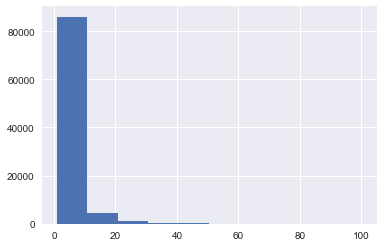

In [13]:
air_rese_df['reserve_visitors'].hist()

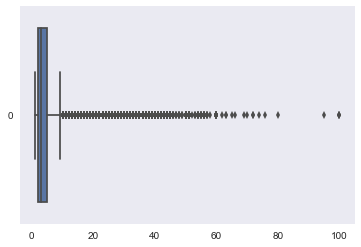

In [14]:
sns.boxplot(data=air_rese_df['reserve_visitors'],
            orient='h')

## 予約客数推移を見る

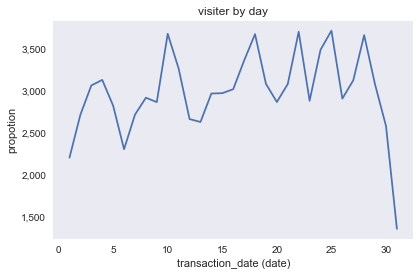

In [15]:
agg = air_rese_df.groupby(air_rese_df.visit_datetime.dt.day).size()
# display(agg)

ax = agg.plot()
ax.set_xlabel('transaction_date (date)')
ax.set_ylabel('propotion')
ax.set_title('visiter by day')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()

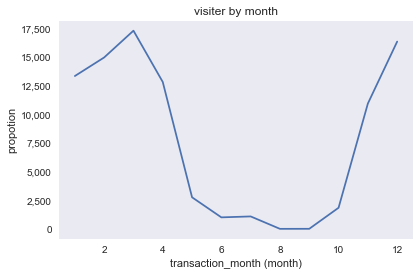

In [16]:
agg = air_rese_df.groupby(air_rese_df.visit_datetime.dt.month).size()
# display(agg)

ax = agg.plot()
ax.set_xlabel('transaction_month (month)')
ax.set_ylabel('propotion')
ax.set_title('visiter by month')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()

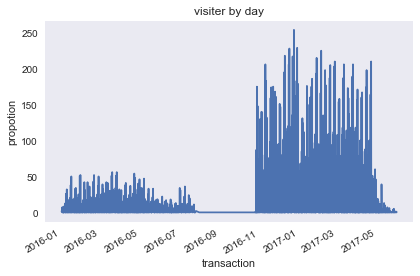

In [44]:
agg = air_rese_df.groupby(air_rese_df.visit_datetime).size()
# display(agg)

ax = agg.plot()
ax.set_xlabel('transaction')
ax.set_ylabel('propotion')
ax.set_title('visiter by day')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()

### 考察  
どうも16年8月から11月までデータが存在していない。  
この事実は注意する必要がある。
また、16年の前半期と後半期ではトランザクション数に大きな差が見られる。  
間の不応期を含めると、大規模なシステム改修やビジネス上の調整を行い、リスタートしたしすてむなのだろうか…   


データを365日に区切って再度集計してみる

In [34]:
limit_air_rese_df = air_rese_df.query\
    ('"2016-01-01 00:00:00" < visit_datetime < "2017-01-01 00:00:00"')

In [35]:
limit_air_rese_df['visit_datetime'].max()

Timestamp('2016-12-31 23:00:00')

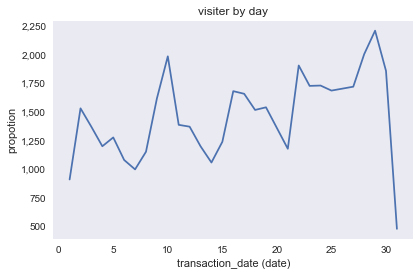

In [36]:
agg = limit_air_rese_df.groupby(limit_air_rese_df.visit_datetime.dt.day).size()
# display(agg)

ax = agg.plot()
ax.set_xlabel('transaction_date (date)')
ax.set_ylabel('propotion')
ax.set_title('visiter by day')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()

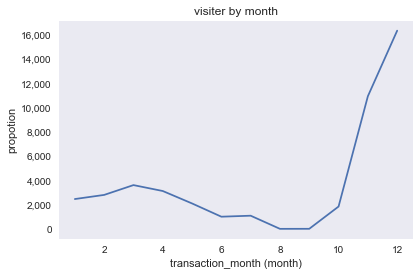

In [37]:
agg = limit_air_rese_df.groupby(limit_air_rese_df.visit_datetime.dt.month).size()
# display(agg)

ax = agg.plot()
ax.set_xlabel('transaction_month (month)')
ax.set_ylabel('propotion')
ax.set_title('visiter by month')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()

## エアレジID毎のトランザクションの割合

In [43]:
air_store_id_dist = air_rese_df.sort_values('air_store_id')\
    .air_store_id.value_counts(normalize=1)
air_store_id_dist.head(10) # 一部

ValueError: No axis named air_store_id for object type <class 'pandas.core.series.Series'>

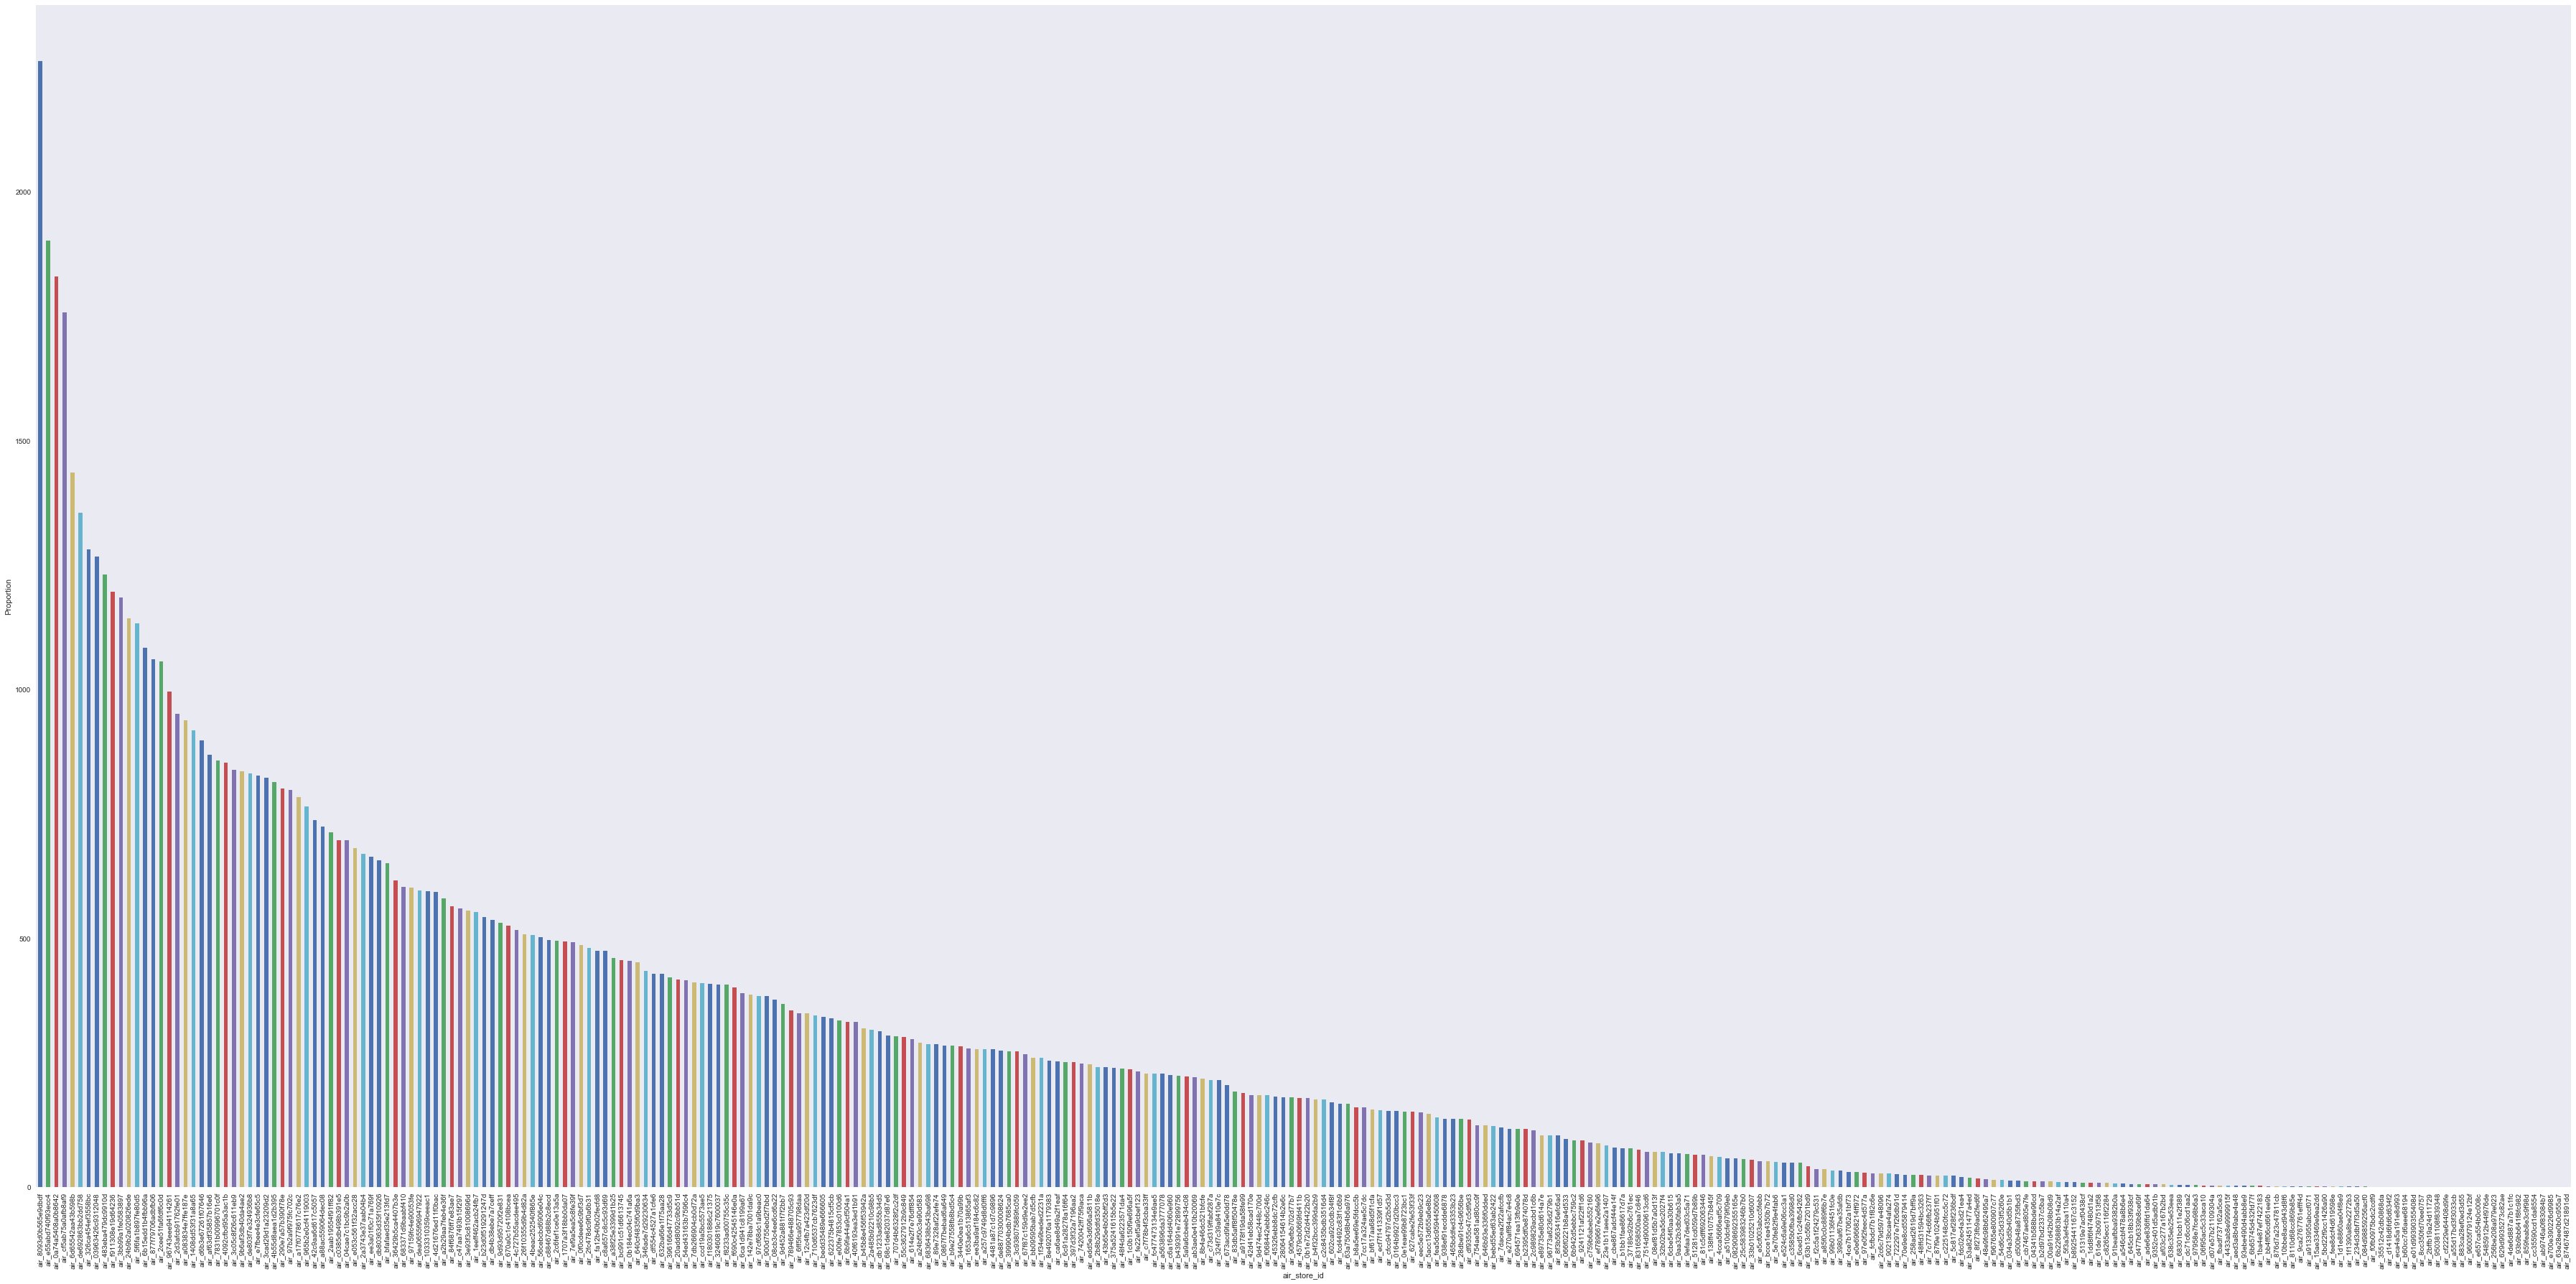

In [41]:
air_store_id_dist.plot.bar(figsize=(50, 25))
plt.xlabel('air_store_id')
plt.ylabel('Proportion')
plt.tight_layout()
#plt.savefig(os.path.join(fig_dir, 'batplot_payment_method_id.png'), dpi=200)
# - `payment_method_id=41` が半数
# - （コードの具体的意味は不明）

## エアレジID毎の顧客数

In [42]:
reserve_visitors_by_store = air_rese_df.sort_values('air_store_id')\
    .groupby('air_store_id')['reserve_visitors'].sum()
reserve_visitors_by_store.head(10) # 一部

air_store_id
air_00a91d42b08b08d9      70
air_0164b9927d20bcc3     517
air_034a3d5b40d5b1b1      93
air_03963426c9312048    8200
air_04341b588bde96cd     208
air_04cae7c1bc9b2a0b    2515
air_066f0221b8a4d533     516
air_06f95ac5c33aca10      31
air_082908692355165e     276
air_084d98859256acf0       8
Name: reserve_visitors, dtype: int64

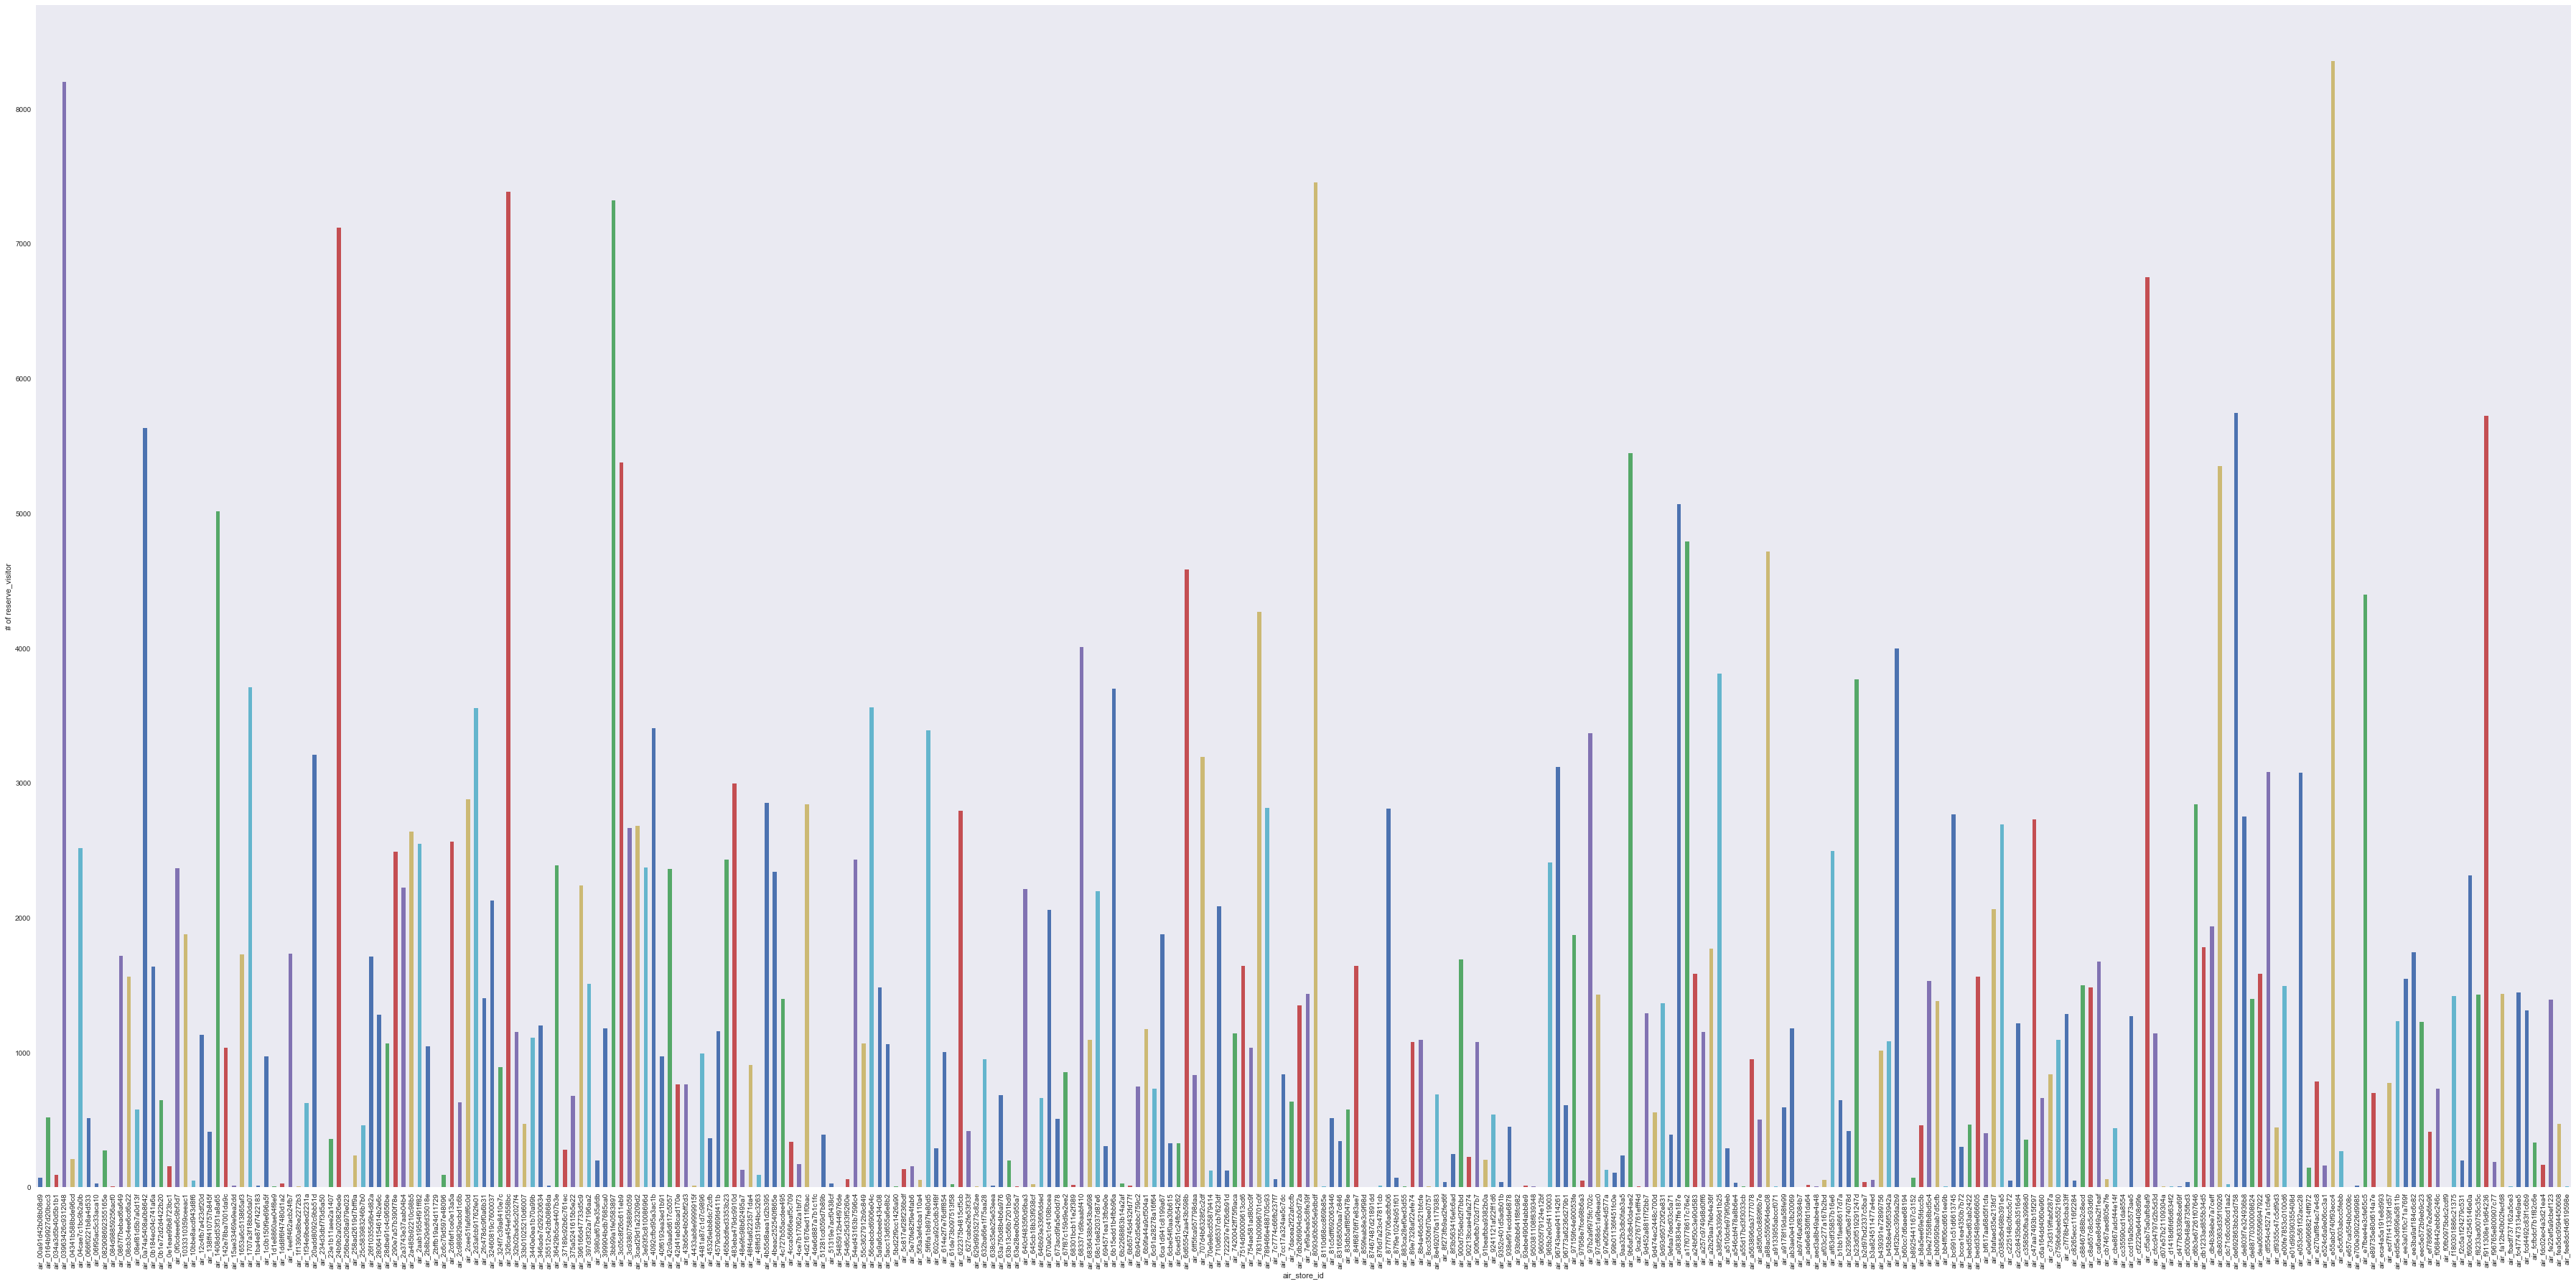

In [77]:
reserve_visitors_by_store.plot.bar(figsize=(50, 25))
plt.xlabel('air_store_id')
plt.ylabel('# of reserve_visitor')
plt.tight_layout()
#plt.savefig(os.path.join(fig_dir, 'batplot_payment_method_id.png'), dpi=200)
# - `payment_method_id=41` が半数
# - （コードの具体的意味は不明）